<a href="https://colab.research.google.com/github/LudovicaCi/saliency-benchmark/blob/main/parallel_plot_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

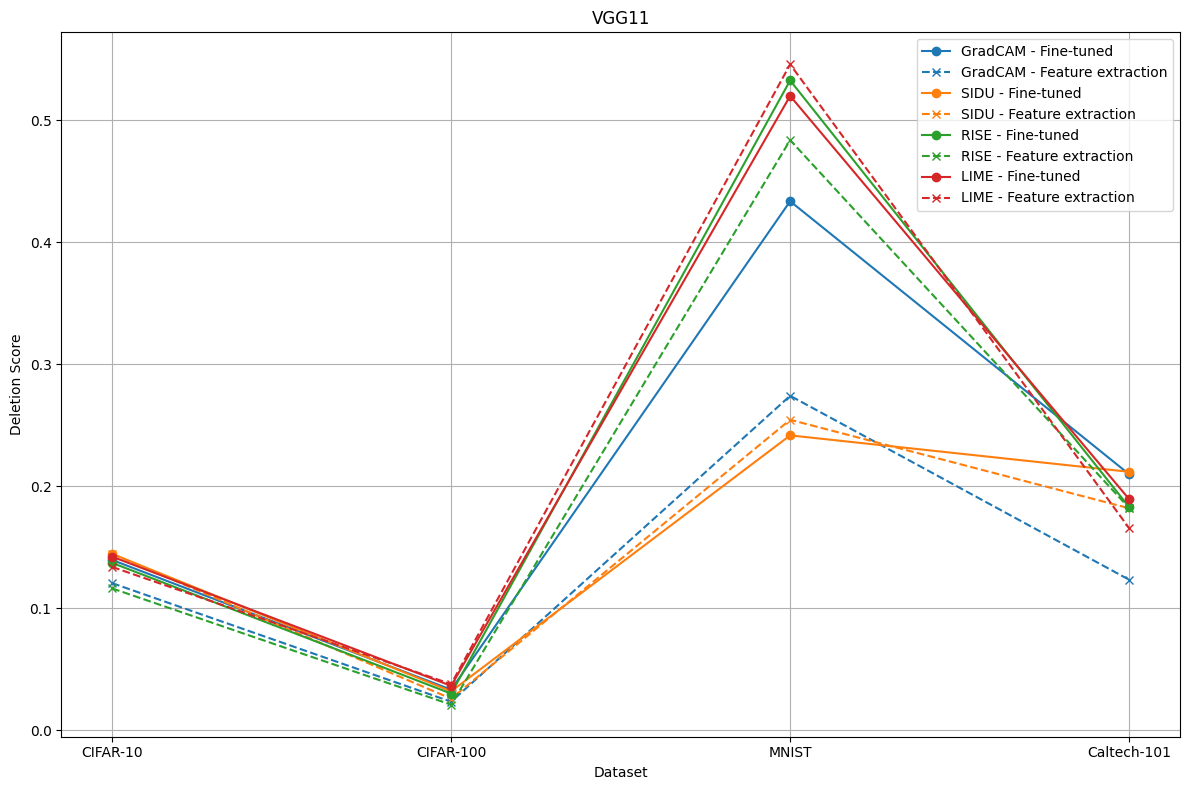

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

saliency_methods = ['GradCAM', 'SIDU', 'RISE', 'LIME']
datasets = ['CIFAR-10', 'CIFAR-100', 'MNIST', 'Caltech-101']

# "Insertion" and "Deletion" data for each saliency method and each dataset
# [fine_tuned_cifar10, non_fine_tuned_cifar10, fine_tuned_cifar100, non_fine_tuned_cifar100, fine_tuned_mnist, non_fine_tuned_mnist, fine_tuned_caltech101, non_fine_tuned_caltech101]
ResNet18_insertion_values = {
    'GradCAM': [0.49168469421578803, 0.17973499682832003, 0.141975653818838, 0.026880153417193065, 0.11438869115427329, 0.08219119830199637, 0.415800215454364, 0.21213443254821007],
    'SIDU': [0.5008166122345713, 0.17657279777766374, 0.13438454986604026, 0.02458991119576192, 0.12689441811723265, 0.09171755519149827, 0.38267392655455235, 0.20527788185348075],
    'RISE': [0.25972258211071214, 0.15115126541644747, 0.06311316136545267, 0.020677082263977267, 0.11202192264503524, 0.09964910962544163, 0.2639116592427991, 0.1571521990133682],
    'LIME': [0.39478246476322226, 0.17657279777766374, 0.11708624033882718, 0.020677082263977267, 0.11644239812996414, 0.08119592415020273, 0.4310072123496484, 0.20554303870354548]
}

ResNet18_deletion_values = {
    'GradCAM': [0.1545283630683759, 0.1253554101990412, 0.0317097857407377, 0.015744380163973618, 0.11497705762010478, 0.07696222439172447, 0.107459809671759, 0.12188100072592738],
    'SIDU': [0.15530022794563578, 0.1253554101990412, 0.03381564080169144, 0.014175515071184424, 0.11496387837762989, 0.09568434514535179, 0.12931640674766592, 0.1278140711705878],
    'RISE': [0.1588251227604007, 0.12799041386988855, 0.031405831681165564, 0.0154598970769903, 0.11338987718075808, 0.08785528002264817, 0.132960250676809, 0.13491965732562375],
    'LIME': [0.18261149775841815, 0.12412829611504407, 0.04788026564514166, 0.01776547254184407, 0.11374659699327924, 0.10682427340736342, 0.1511567006297948, 0.12224450203644102]
}

VGG11_insertion_values = {
    'GradCAM': [0.3878395588143312, 0.3255501082922574, 0.0820523023486404, 0.08256670561549906, 0.8145703322823044, 0.7672483194268124, 0.436972137704655, 0.47239920530524127],
    'SIDU': [0.35611425268004093, 0.31947658663912387, 0.07041984455617142, 0.07971354465652894, 0.8966762710777948, 0.8074384131307848, 0.39525585695133875, 0.3967730683127487],
    'RISE': [0.23220765412113736, 0.2097590788913632, 0.05567287332939398, 0.049004066966476335, 0.6155935089200825, 0.507015716871707, 0.35480920002285765, 0.28126900922335524],
    'LIME': [0.3720237992127922, 0.3564425625525548, 0.07503680632767082, 0.08135417200706516, 0.8596367515884685, 0.6861348911320342, 0.49492540854405465, 0.4657351910436644]
}

VGG11_deletion_values = {
    'GradCAM': [0.13965878773101775, 0.12065038812999435, 0.033320806216705, 0.023417537204124667, 0.4337643449508435, 0.27425047180007106, 0.209917815307012, 0.12343482264139105],
    'SIDU': [0.14465784878829338, 0.14465784878829338, 0.031951274135263996, 0.025939979399324638, 0.2417828915530947, 0.2545854881085626, 0.2119184699339528, 0.18201292864709762],
    'RISE': [0.13726713610158098, 0.11633284339001133, 0.03009028254354365, 0.020978166181224337, 0.5327919633219556, 0.4838837926692261, 0.18296419730903252, 0.18220942268437362],
    'LIME': [0.14234410758075744, 0.1339251075493536, 0.03644442601982964, 0.0378481656520977, 0.5200877943146545, 0.5459830125230732, 0.18947953979776408, 0.16568294522403956]
}

values = VGG11_deletion_values

# Create a DataFrame from the data
data = []
for method in saliency_methods:
    for i, dataset in enumerate(datasets):
        data.append({
            'Dataset': dataset,
            'Method': method,
            'Fine-tuned': values[method][2 * i],
            'Feature extraction': values[method][2 * i + 1]
        })

df = pd.DataFrame(data)

# Create a parallel plot
plt.figure(figsize=(12, 8))

# Define default colors from Matplotlib
colors = plt.cm.tab10.colors  # Default color map
color_map = {method: colors[i % len(colors)] for i, method in enumerate(saliency_methods)}

# Plot each saliency method
for method in saliency_methods:
    subset = df[df['Method'] == method]
    color = color_map[method]  # Ensure the same color for Fine-tuned and Feature extraction
    plt.plot(subset['Dataset'], subset['Fine-tuned'], label=f'{method} - Fine-tuned', linestyle='-', color=color, marker='o')
    plt.plot(subset['Dataset'], subset['Feature extraction'], label=f'{method} - Feature extraction', linestyle='--', color=color, marker='x')

# Labeling and formatting the plot
plt.xlabel('Dataset')
plt.ylabel('Deletion Score')
plt.title('VGG11')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()